In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 애플(AAPL) 주식 데이터 다운로드
apple = yf.download('AAPL', start='2022-07-13', end='2024-01-01')

# 삼성(SSNLF) 주식 데이터 다운로드
samsung = yf.download('005930.KS', start='2022-07-13', end='2024-01-01')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


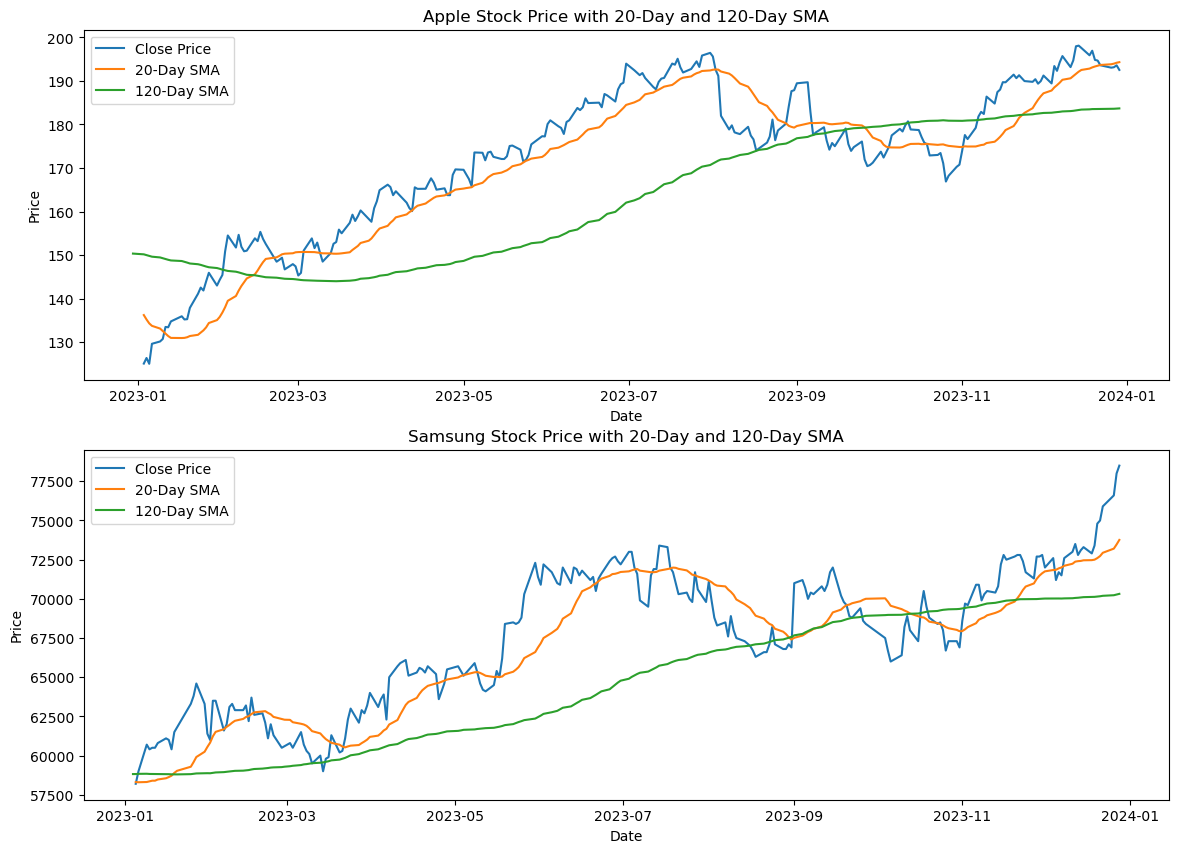

In [3]:
def simple_moving_average(data, window):
    sma = data.rolling(window=window).mean()
    return sma


def plot_close(data, ax, name):
    ax.plot(data.iloc[120:]['Close'], label='Close Price')
    ax.plot(data.iloc[120:]['SMA_20'], label='20-Day SMA')
    ax.plot(data['SMA_120'], label='120-Day SMA')
    ax.legend()
    ax.set_title(f'{name[0].upper()+name[1:]} Stock Price with 20-Day and 120-Day SMA')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

# 단순 이동 평균 계산
apple['SMA_20'] = simple_moving_average(apple['Close'], 20)
apple['SMA_120'] = simple_moving_average(apple['Close'], 120)
samsung['SMA_20'] = simple_moving_average(samsung['Close'], 20)
samsung['SMA_120'] = simple_moving_average(samsung['Close'], 120)

# 그래프 시각화
fig, axs = plt.subplots(2, 1, figsize=(14, 10))
plot_close(apple, axs[0], 'apple')
plot_close(samsung, axs[1], 'samsung')

plt.show()


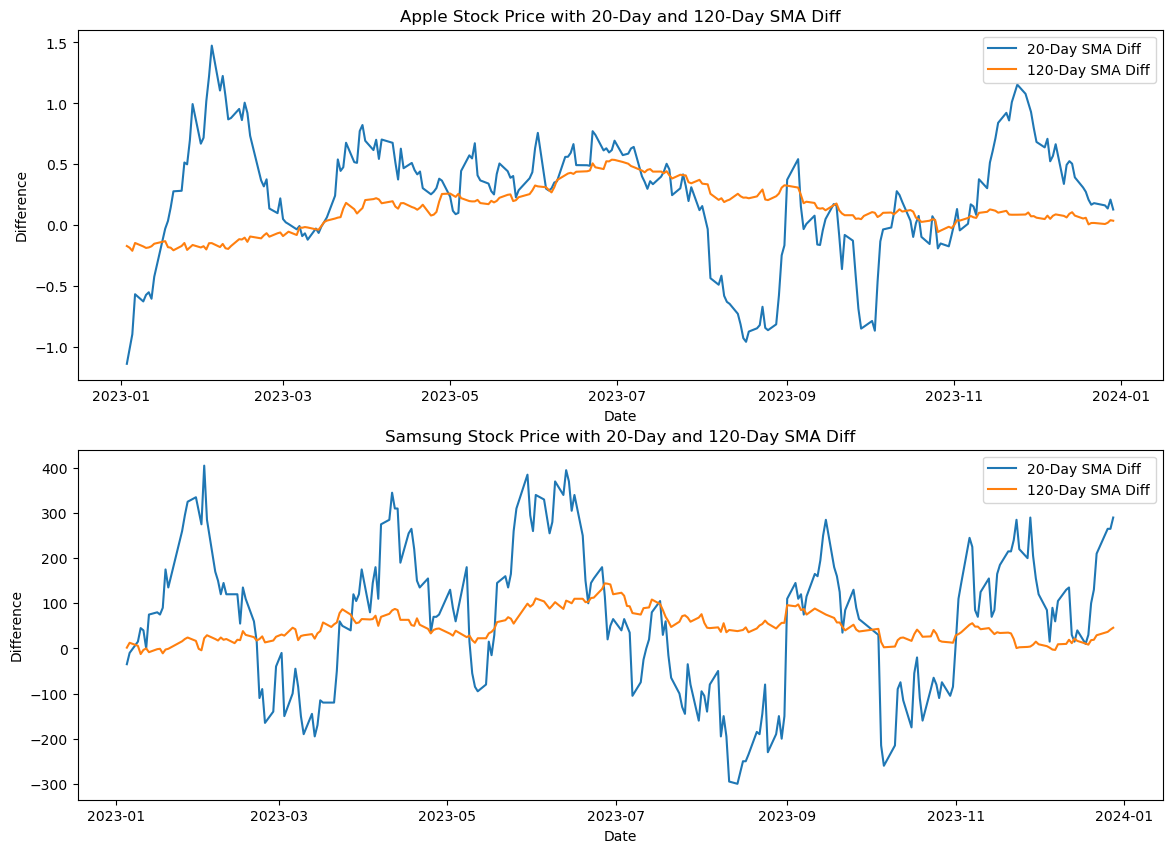

In [4]:
def plot_diff(data, ax, name):
    ax.plot(data.iloc[120:]['SMA_20_diff'], label='20-Day SMA Diff')
    ax.plot(data.iloc[120:]['SMA_120_diff'], label='120-Day SMA Diff')
    ax.legend()
    ax.set_title(f'{name[0].upper()+name[1:]} Stock Price with 20-Day and 120-Day SMA Diff')
    ax.set_xlabel('Date')
    ax.set_ylabel('Difference')
    # ax.grid()


apple['SMA_20_diff'] = apple['SMA_20'].diff()
apple['SMA_120_diff'] = apple['SMA_120'].diff()
samsung['SMA_20_diff'] = samsung['SMA_20'].diff()
samsung['SMA_120_diff'] = samsung['SMA_120'].diff()

fig, axs = plt.subplots(2, 1, figsize=(14, 10))
plot_diff(apple, axs[0], 'apple')
plot_diff(samsung, axs[1], 'samsung')

plt.show()

/tmp/ipykernel_52042/3112433488.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(data.iloc[120:][inc_sma_20].index, data.iloc[120:][inc_sma_20]['SMA_20_diff'], color='g', label='20-Day SMA Up')
/tmp/ipykernel_52042/3112433488.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(data.iloc[120:][inc_sma_20].index, data.iloc[120:][inc_sma_20]['SMA_20_diff'], color='g', label='20-Day SMA Up')
/tmp/ipykernel_52042/3112433488.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(data.iloc[120:][dec_sma_20].index, data.iloc[120:][dec_sma_20]['SMA_20_diff'], color='r', label='20-Day SMA Down')
/tmp/ipykernel_52042/3112433488.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(data.iloc[120:][dec_sma_20].index, data.iloc[120:][dec_sma_20]['SMA_20_diff'], color='r', label='20-Day SMA Down')
/tmp/ipykernel_52042/3112433488.py:12: UserWarni

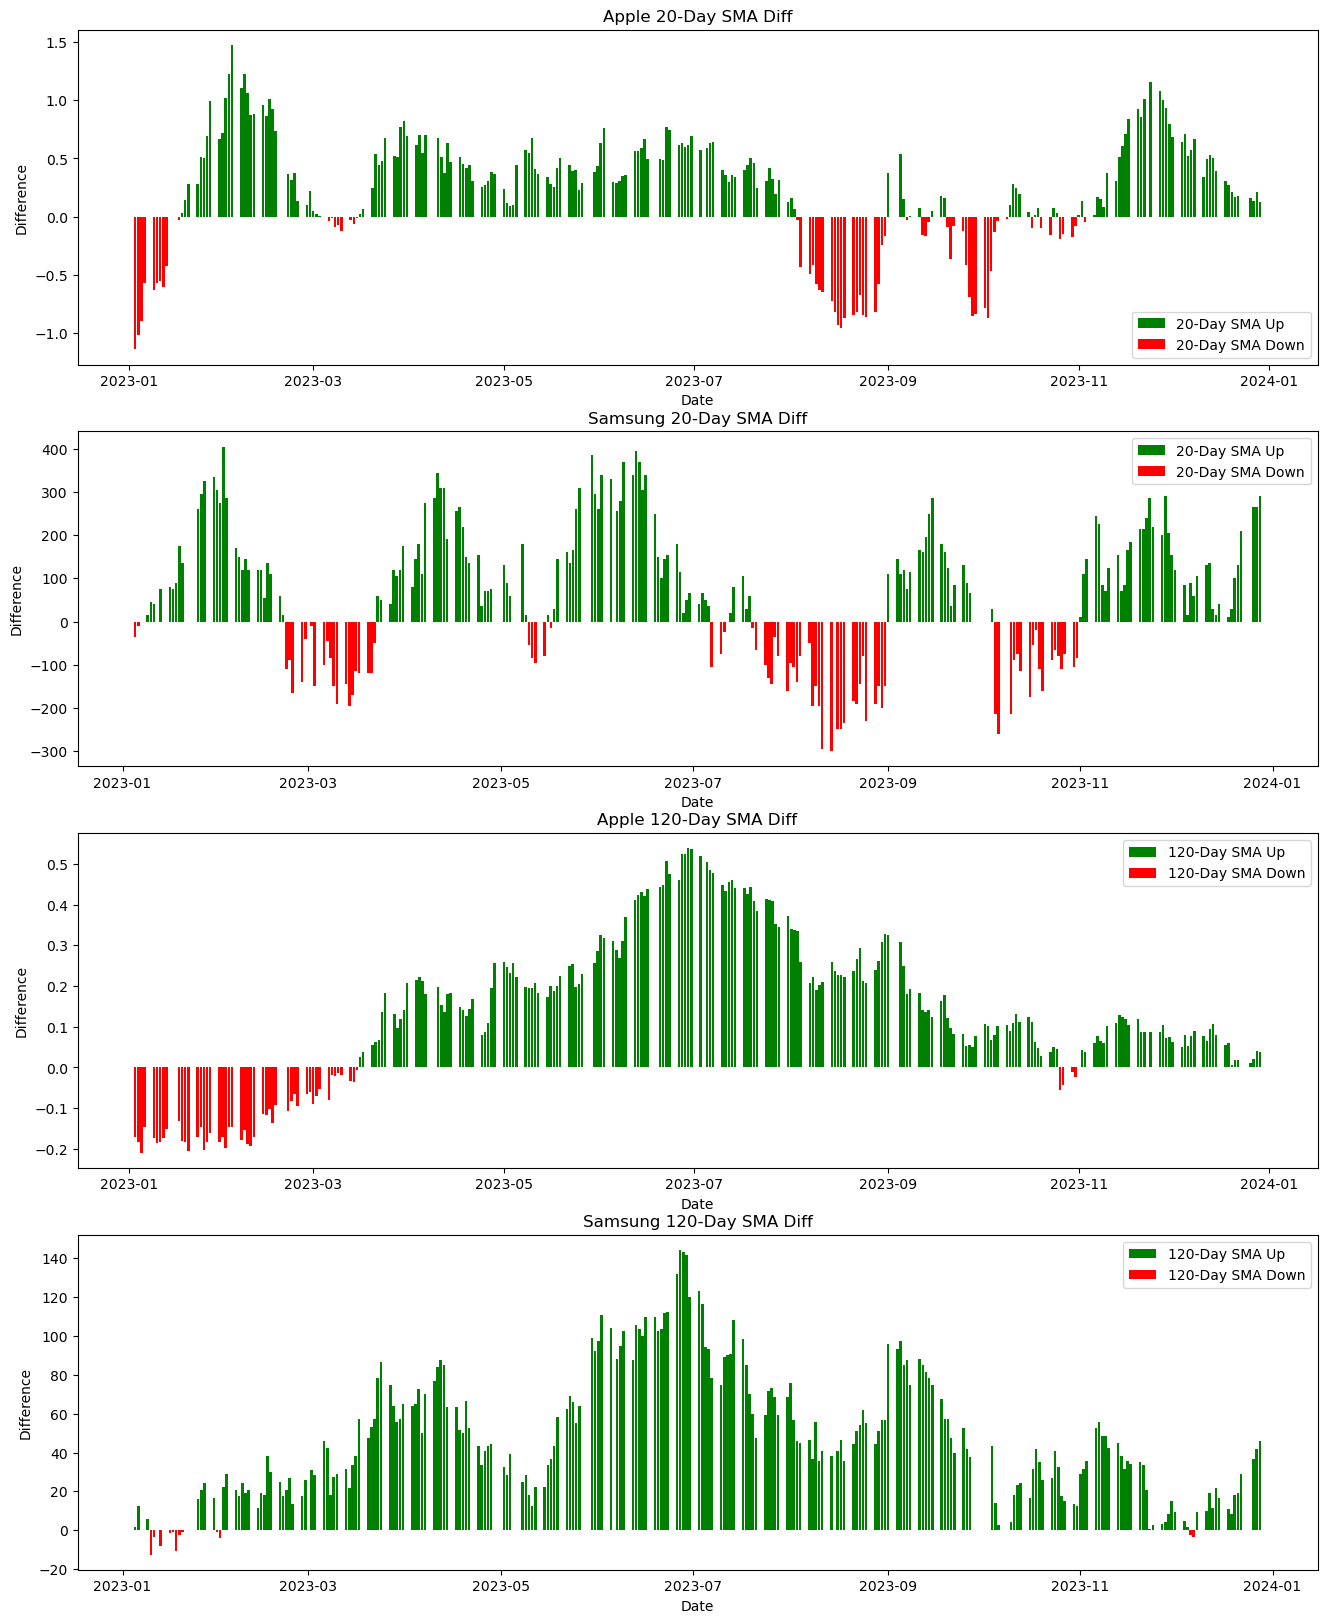

In [12]:
def plot_sign_sma_20(data, ax, name):
    inc_sma_20 = data['SMA_20_diff'] > 0
    dec_sma_20 = data['SMA_20_diff'] < 0
    tmp_b = []
    for i in range(len(data.iloc[120:]['SMA_20_diff'].index)-1):
        if data.iloc[120+i]['SMA_20_diff'] > 0 and data.iloc[120+i+1]['SMA_20_diff'] < 0 or data.iloc[120+i]['SMA_20_diff'] < 0 and data.iloc[120+i+1]['SMA_20_diff'] > 0:
            tmp_b.append(data.iloc[120:]['SMA_20_diff'].index[i])
            tmp_b.append(data.iloc[120:]['SMA_20_diff'].index[i+1])
    tmp_b = list(set(tmp_b))
    global boundary
    boundary.append(tmp_b)
    ax.bar(data.iloc[120:][inc_sma_20].index, data.iloc[120:][inc_sma_20]['SMA_20_diff'], color='g', label='20-Day SMA Up')
    ax.bar(data.iloc[120:][dec_sma_20].index, data.iloc[120:][dec_sma_20]['SMA_20_diff'], color='r', label='20-Day SMA Down')
    ax.legend()
    ax.set_title(f'{name[0].upper()+name[1:]} 20-Day SMA Diff')
    ax.set_xlabel('Date')
    ax.set_ylabel('Difference')


def plot_sign_sma_120(data, ax, name):
    inc_sma_120 = data['SMA_120_diff'] > 0
    dec_sma_120 = data['SMA_120_diff'] < 0
    tmp_b = []
    for i in range(len(data.iloc[120:]['SMA_120_diff'].index)-1):
        if data.iloc[120+i]['SMA_120_diff'] > 0 and data.iloc[120+i+1]['SMA_120_diff'] < 0 or data.iloc[120+i]['SMA_120_diff'] < 0 and data.iloc[120+i+1]['SMA_120_diff'] > 0:
            tmp_b.append(data.iloc[120:]['SMA_120_diff'].index[i])
            tmp_b.append(data.iloc[120:]['SMA_120_diff'].index[i+1])
    tmp_b = list(set(tmp_b))
    global boundary
    boundary.append(tmp_b)
    ax.bar(data.iloc[120:][inc_sma_120].index, data.iloc[120:][inc_sma_120]['SMA_120_diff'], color='g', label='120-Day SMA Up')
    ax.bar(data.iloc[120:][dec_sma_120].index, data.iloc[120:][dec_sma_120]['SMA_120_diff'], color='r', label='120-Day SMA Down')
    ax.legend()
    ax.set_title(f'{name[0].upper()+name[1:]} 120-Day SMA Diff')
    ax.set_xlabel('Date')
    ax.set_ylabel('Difference')


fig, axs = plt.subplots(4, 1, figsize=(16, 20))

boundary = []
plot_sign_sma_20(apple, axs[0], 'apple')
plot_sign_sma_20(samsung, axs[1], 'samsung')
plot_sign_sma_120(apple, axs[2], 'apple')
plot_sign_sma_120(samsung, axs[3], 'samsung')

plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 2) + inhomogeneous part.

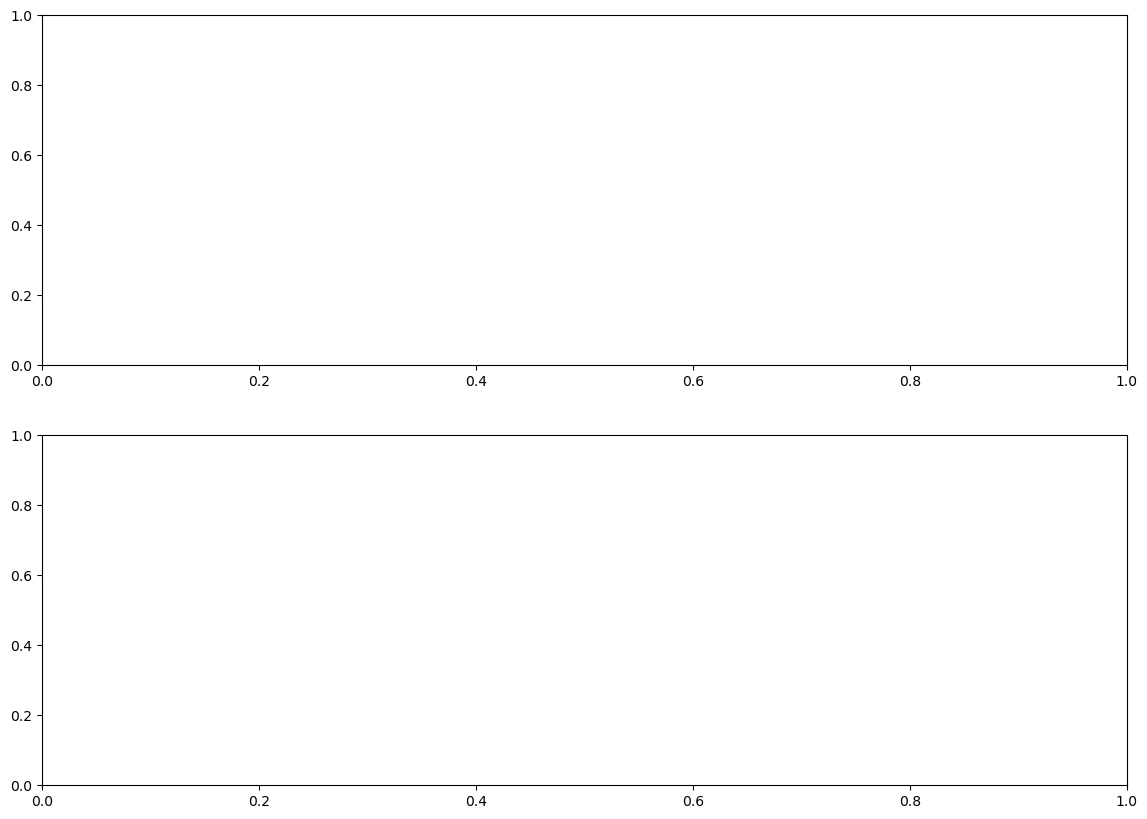

In [10]:
def plot_boundary(data, ax, name):
    for i in range(0, len(boundary), 2):
        ax.axvspan(boundary[i], boundary[i+1], color='gray', alpha=0.3)
    ax.plot(data.iloc[120:]['Close'], label='Close Price')
    ax.plot(data.iloc[120:]['SMA_20'], label='20-Day SMA')
    ax.plot(data['SMA_120'], label='120-Day SMA')
    ax.legend()
    ax.set_title(f'{name[0].upper()+name[1:]} Stock Price with 20-Day and 120-Day SMA')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')


fig, axs = plt.subplots(2, 1, figsize=(14, 10))
plot_boundary(apple, axs[0], 'apple')
plot_boundary(samsung, axs[1], 'samsung')